In [1]:
import pandas as pd 
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
# df.to_csv('../static/model/iris.csv', index=False)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])
# y = df.iloc[:, -1].values
X_scaled.shape #, y.shape

(150, 4)

In [7]:
df.iloc[:, :-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_array = pca.fit_transform(X_scaled)
df = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df.tail()

,pca_x,pca_y
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254
149,0.960656,-0.024332


In [9]:
df['target'] = df.iloc[:, -1].values
# df['target'] = y
df.tail()

,pca_x,pca_y,target
145,1.870503,0.386966,0.386966
146,1.564580,-0.896687,-0.896687
147,1.521170,0.269069,0.269069
148,1.372788,1.011254,1.011254
149,0.960656,-0.024332,-0.024332


In [20]:
k_number = 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k_number, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=2021)

In [21]:
df['cluster'] = kmeans.labels_
df.head()

,pca_x,pca_y,target,cluster
0,-2.264703,0.480027,0,3
1,-2.080961,-0.674134,0,0
2,-2.364229,-0.341908,0,0
3,-2.299384,-0.597395,0,0
4,-2.389842,0.646835,0,3


No handles with labels found to put in legend.


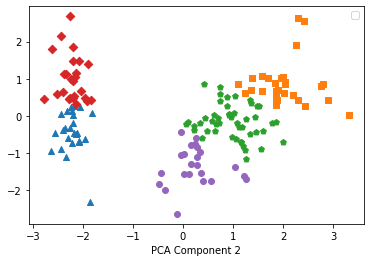

In [22]:
markers = ['^', 's', 'p', 'D', 'o', 'H', 'x']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = df[df['cluster'] == i]['pca_x']
    y_axis_data = df[df['cluster'] == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('PCA Component 1')
plt.xlabel('PCA Component 2')
plt.show()

In [23]:
df.target.unique()

array([0, 1, 2])

In [14]:
range(len(df.target.unique()))

range(0, 149)

No handles with labels found to put in legend.


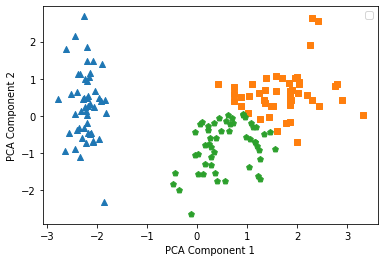

In [24]:
for i in df.target.unique():
    marker = markers[i]
    x_axis_data = df[df['target'] == i]['pca_x']
    y_axis_data = df[df['target'] == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

No handles with labels found to put in legend.


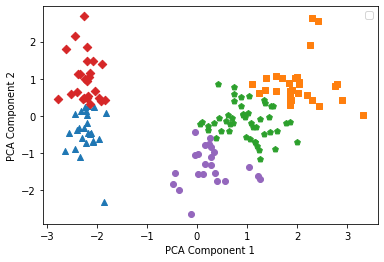

In [25]:
for i in range(k_number):
    marker = markers[i]
    x_axis_data = df[df['cluster'] == i]['pca_x']
    y_axis_data = df[df['cluster'] == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from werkzeug.utils import secure_filename